# Apply logistic regression to categorize whether a county had high mortality rate due to contamination

## 1. Import the necessary packages to read in the data, plot, and create a logistic regression model

In [10]:
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

## 2. Read in the hanford.csv file in the `data/` folder 

In [2]:
df = pd.read_csv('../data/hanford.csv')

<img src="../../images/hanford_variables.png"></img>

## 3. Calculate the basic descriptive statistics on the data

In [3]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


## 4. Find a reasonable threshold to say exposure is high and recode the data 

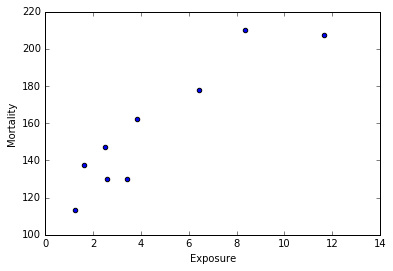

In [5]:
df.plot(kind = 'scatter', x = 'Exposure', y = 'Mortality')

In [12]:
df['Mortality'].mean() + 3 * df['Mortality'].std()

261.71848336217533

In [13]:
df['Exposure'].mean() + 3 * df['Exposure'].std()

15.09135285985935

In [16]:
high_exposure = df['Exposure'].median()

In [17]:
high_mortality = df['Mortality'].median()

In [18]:
df['Mort_high'] = df['Mortality'].apply(lambda x:1 if x >= high_mortality else 0)
df['Expo_high'] = df['Mortality'].apply(lambda x:1 if x >= high_mortality else 0)

In [19]:
df

,County,Exposure,Mortality,Mort_high,Expo_high
0,Umatilla,2.49,147.1,1,1
1,Morrow,2.57,130.1,0,0
2,Gilliam,3.41,129.9,0,0
3,Sherman,1.25,113.5,0,0
4,Wasco,1.62,137.5,0,0
5,HoodRiver,3.83,162.3,1,1
6,Portland,11.64,207.5,1,1
7,Columbia,6.41,177.9,1,1
8,Clatsop,8.34,210.3,1,1


## 5. Create a logistic regression model

In [20]:
lm = LogisticRegression()
data = np.asarray(df[['Mort_high', 'Expo_high']]) #data is a list of lists
x = data[:,1:] # the second colon is in case you have more than one input in your prediction model
y = data[:,0]
lm.fit(x,y)
lm.score(x,y)  #This gives you r^2, or coefficient of determination
slope = lm.coef_[0] #the coefficients are a list (here, we’re just using one) of the slopes for each x value
intercept = lm.intercept_

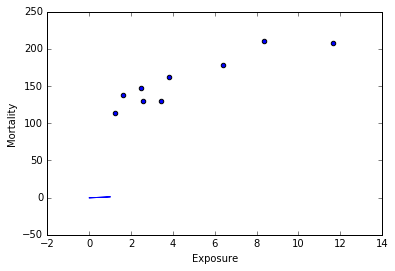

In [22]:
df.plot(kind = 'scatter', x = 'Exposure', y = 'Mortality')
plt.plot(df['Expo_high'], slope * df['Mort_high'] + intercept, '-')

## 6. Predict whether the mortality rate (Cancer per 100,000 man years) will be high at an exposure level of 50

In [23]:
lm.predict(50)

array([1])

Yes